In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/concatenated.csv')
df.head()

,id,prompt_id,text,generated,model,kaggle_repo
0,d429f032,0,Advantages of Limiting Car Usage \n\nLimiting ...,1,gpt-3.5-turbo,1
1,1ce279be,0,Advantages of Limiting Car Usage\n\nLimiting c...,1,gpt-3.5-turbo,1
2,c9595213,0,Limiting car usage has numerous advantages tha...,1,gpt-3.5-turbo,1
3,f2266d87,0,The passages provided discuss the advantages o...,1,gpt-3.5-turbo,1
4,eeace4bd,0,Title: The Advantages of Limiting Car Usage\n\...,1,gpt-3.5-turbo,1


In [3]:
df.drop(columns=['id','prompt_id'],inplace=True)

In [4]:
df.shape

(54691, 4)

In [5]:
df.isna().sum()

,0
text,0
generated,0
model,0
kaggle_repo,0


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['model']= label_encoder.fit_transform(df['model'])

In [7]:
df.head()

,text,generated,model,kaggle_repo
0,Advantages of Limiting Car Usage \n\nLimiting ...,1,2,1
1,Advantages of Limiting Car Usage\n\nLimiting c...,1,2,1
2,Limiting car usage has numerous advantages tha...,1,2,1
3,The passages provided discuss the advantages o...,1,2,1
4,Title: The Advantages of Limiting Car Usage\n\...,1,2,1


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns",None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
df['text'] = df['text'].str.lower()
df.head()

,text,generated,model,kaggle_repo
0,advantages of limiting car usage \n\nlimiting ...,1,2,1
1,advantages of limiting car usage\n\nlimiting c...,1,2,1
2,limiting car usage has numerous advantages tha...,1,2,1
3,the passages provided discuss the advantages o...,1,2,1
4,title: the advantages of limiting car usage\n\...,1,2,1


In [10]:
vocab = stopwords.words('english')
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in vocab:
            new_text.append(' ')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

df['text'] = df['text'].apply(remove_stopwords)
df.head()

,text,generated,model,kaggle_repo
0,advantages limiting car usage limiting car u...,1,2,1
1,advantages limiting car usage limiting car u...,1,2,1
2,limiting car usage numerous advantages b...,1,2,1
3,passages provided discuss advantages lim...,1,2,1
4,title: advantages limiting car usage intro...,1,2,1


In [11]:
import re
def remove_urls (vTEXT):
    vTEXT = re.sub('http://\S+|https://\S+', '', vTEXT)
    return(vTEXT)

df['text'] = df['text'].apply(remove_urls)
df['text'].head()

,text
0,advantages limiting car usage limiting car u...
1,advantages limiting car usage limiting car u...
2,limiting car usage numerous advantages b...
3,passages provided discuss advantages lim...
4,title: advantages limiting car usage intro...


In [12]:
import string
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char," ")
    return text

df['text'] = df['text'].apply(remove_punc)
df['text']

,text
0,advantages limiting car usage limiting car u...
1,advantages limiting car usage limiting car u...
2,limiting car usage numerous advantages b...
3,passages provided discuss advantages lim...
4,title advantages limiting car usage intro...
...,...
54686,believe using cellphones class education...
54687,working alone students argue de...
54688,a problem chance best thin...
54689,many people disagree albert schweitzer s quo...


In [13]:
import unicodedata
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

df['text'] = df['text'].apply(strip_accents)
df.head()

,text,generated,model,kaggle_repo
0,advantages limiting car usage limiting car u...,1,2,1
1,advantages limiting car usage limiting car u...,1,2,1
2,limiting car usage numerous advantages b...,1,2,1
3,passages provided discuss advantages lim...,1,2,1
4,title advantages limiting car usage intro...,1,2,1


In [14]:
#1 ai 0 human
words_list = df[df['generated']==0]['text'].unique().tolist()
human = " ".join(words_list)

wordcloud =  WordCloud(
                  width=500, height = 300,
                  stopwords=vocab).generate(human)

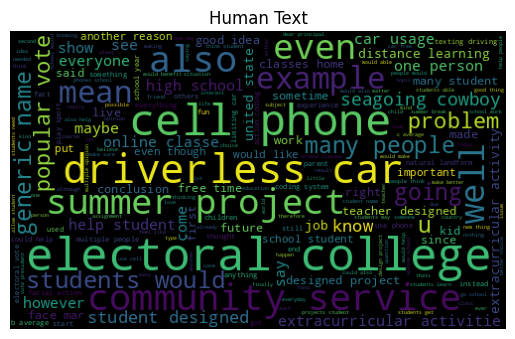

In [15]:
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Human Text')
plt.show()

In [16]:
#1 ai 0 human
words_list = df[df['generated']==1]['text'].unique().tolist()
ai = " ".join(words_list)

wordcloud =  WordCloud(
                  width=500, height = 300,
                  stopwords=vocab).generate(ai)

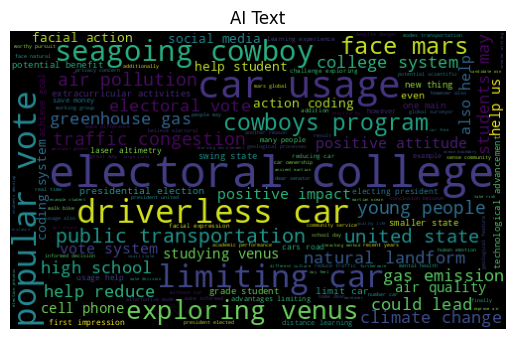

In [17]:
plt.imshow(wordcloud)
plt.axis("off")
plt.title('AI Text')
plt.show()

In [18]:
def tokenize(text):
     return word_tokenize(text)

In [19]:
df['text'] = df['text'].apply(tokenize)
df.head()

,text,generated,model,kaggle_repo
0,"[advantages, limiting, car, usage, limiting, c...",1,2,1
1,"[advantages, limiting, car, usage, limiting, c...",1,2,1
2,"[limiting, car, usage, numerous, advantages, b...",1,2,1
3,"[passages, provided, discuss, advantages, limi...",1,2,1
4,"[title, advantages, limiting, car, usage, intr...",1,2,1


In [20]:
ps = PorterStemmer()

def stemming(text):
    return " ".join([ps.stem(word) for word in text])

In [21]:
df['text'] = df['text'].apply(stemming)
df.head()

,text,generated,model,kaggle_repo
0,advantag limit car usag limit car usag number ...,1,2,1
1,advantag limit car usag limit car usag numer a...,1,2,1
2,limit car usag numer advantag becom increasing...,1,2,1
3,passag provid discuss advantag limit car usag ...,1,2,1
4,titl advantag limit car usag introduct limit c...,1,2,1


In [41]:
X_train = df['text']
y_train = df['generated']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=7000)
tfidf_train = tfidf.fit_transform(X_train).toarray()

In [24]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [44]:
clf = MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True)
clf.fit(tfidf_train, y_train)


MultinomialNB(alpha=0.8)

In [27]:
import pickle
pickle.dump(clf, open('model_gaussianNB.pkl', 'wb'))


In [45]:

X_train, X_test, y_train, y_test = train_test_split(tfidf_train, y_train, test_size=0.25, random_state=42)


In [46]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print(classification_report(y_test,y_pred))


Accuracy: 0.95436261244789
Precision: 0.9771612248350533
Recall: 0.9219473264166002
F1-score: 0.9487516425755584
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7408
           1       0.98      0.92      0.95      6265

    accuracy                           0.95     13673
   macro avg       0.96      0.95      0.95     13673
weighted avg       0.96      0.95      0.95     13673

